# Load the data

In [74]:
import pandas as pd


path = "../final_data/player_physical_splits.csv"
df = pd.read_csv(path)
df.head()

,Total Distance,Walking Distance,Jogging Distance,Low Speed Running Distance,High Speed Running Distance,Sprinting Distance,Walking Count,Jogging Count,Low Speed Running Count,High Speed Running Count,Sprinting Count,Minute Splits,player_name,player_id,game_opta_id,team_id,team_name,half
0,632.80,145.77,299.67,168.66,18.70,0.00,26,35,15,3,0,5,Kerstin Casparij,447080.0,2312135,9660.0,Manchester City WFC,1
1,687.34,127.55,321.52,169.71,49.17,19.40,19,33,22,7,1,10,Kerstin Casparij,447080.0,2312135,9660.0,Manchester City WFC,1
2,595.82,169.12,245.98,152.38,26.81,1.54,26,35,16,2,0,15,Kerstin Casparij,447080.0,2312135,9660.0,Manchester City WFC,1
3,525.94,141.85,242.33,101.79,17.70,22.28,25,32,12,2,2,20,Kerstin Casparij,447080.0,2312135,9660.0,Manchester City WFC,1
4,288.63,146.04,83.84,58.75,0.00,0.00,8,12,4,0,0,25,Kerstin Casparij,447080.0,2312135,9660.0,Manchester City WFC,1


# Create a dictionary of which matches each player has played

For example: `'Kerstin Casparij': array([2312135, 2312152, 2312166, 2312183]`

In [31]:
dict = {}
players = df['player_name'].unique()

for i in range(0,len(players)):
    games_by_each_player = df.loc[df['player_name'] == players[i]]['game_opta_id'].unique()
    dict[players[i]] = games_by_each_player


{'Kerstin Casparij': array([2312135, 2312152, 2312166, 2312183], dtype=int64),
 'Ellie Roebuck': array([2312135, 2312152, 2312166, 2312183, 2312213], dtype=int64),
 'Laia Aleixandri': array([2312135, 2312152, 2312166, 2312183, 2312213], dtype=int64),
 'Chloe Kelly': array([2312135, 2312152, 2312166, 2312183, 2312213], dtype=int64),
 'Hayley Raso': array([2312135, 2312152, 2312166, 2312183], dtype=int64),
 'Alex Greenwood': array([2312135, 2312152, 2312166, 2312183, 2312213], dtype=int64),
 'Steph Houghton': array([2312135, 2312152, 2312213], dtype=int64),
 'Lauren Hemp': array([2312135, 2312152, 2312166, 2312213], dtype=int64),
 'Khadija Shaw': array([2312135, 2312152, 2312166, 2312183, 2312213], dtype=int64),
 'Filippa Angeldahl': array([2312135, 2312152, 2312183, 2312213], dtype=int64),
 'Yui Hasegawa': array([2312135, 2312152, 2312166, 2312183, 2312213], dtype=int64),
 'Laura Coombs': array([2312135, 2312152, 2312166, 2312183, 2312213], dtype=int64),
 'Manuela Zinsberger': array([23

## Visualise total distance covered by each player for each match

Kerstin Casparij


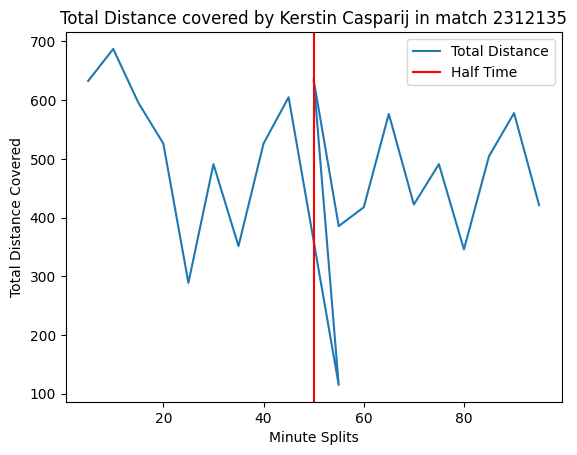

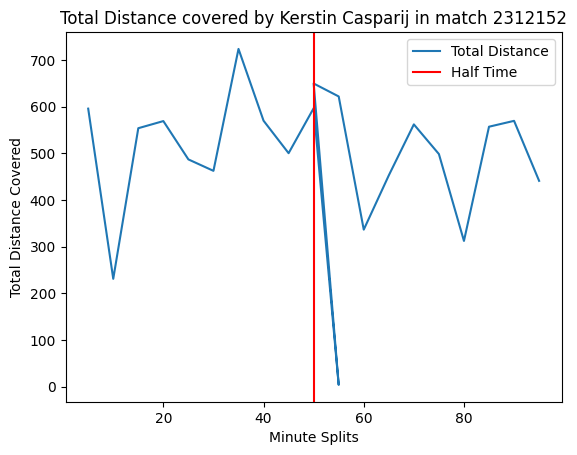

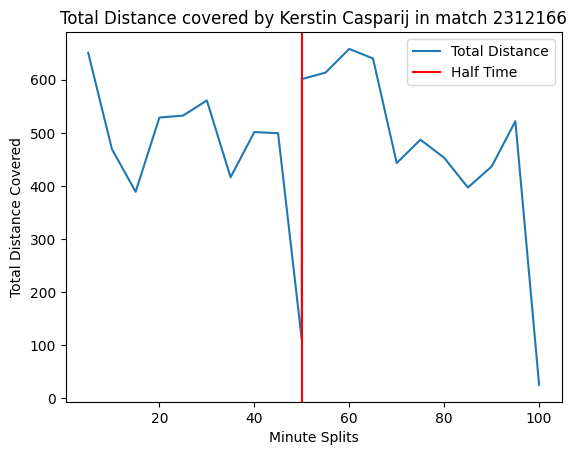

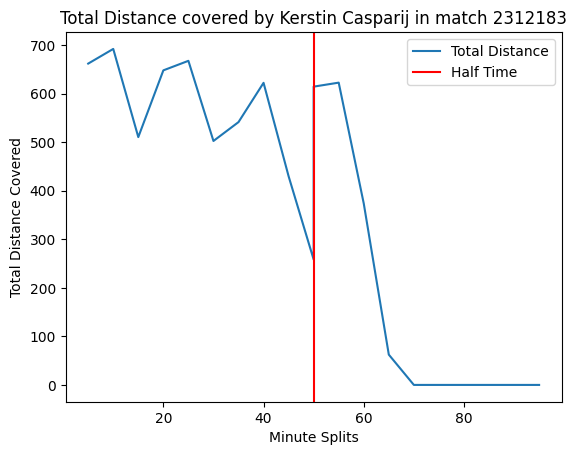

In [73]:
for i in dict:
   print(i)
   for j in dict[i]:
      plt.figure()
      plt.title(f"Total Distance covered by {i} in match {j}")
      plt.plot(
         df.loc[(df['player_name']==i) & (df['game_opta_id'] == j)]['Minute Splits'], 
         df.loc[(df['player_name']==i) & (df['game_opta_id'] == j)]['Total Distance'], 
         label="Total Distance")	
      plt.axvline(x=50,color='red', label="Half Time")
      plt.xlabel('Minute Splits')
      plt.ylabel('Total Distance Covered')
      plt.legend()
      plt.show()
   break





# Create a dictionary of which players are in each match

For example: `2312135: array(['Kerstin Casparij', 'Ellie Roebuck', 'Laia Aleixandri'...`

In [167]:
dict_matches = {}
players = df['game_opta_id'].unique()

for i in range(0,len(players)):
    games_by_each_player = df.loc[df['game_opta_id'] == players[i]]['player_name'].unique()
    dict_matches[players[i]] = games_by_each_player






## Visualise the total distance covered by each player in a match

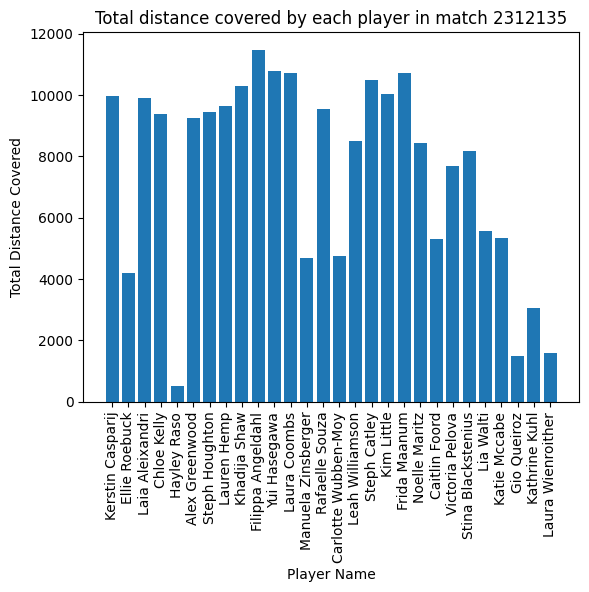

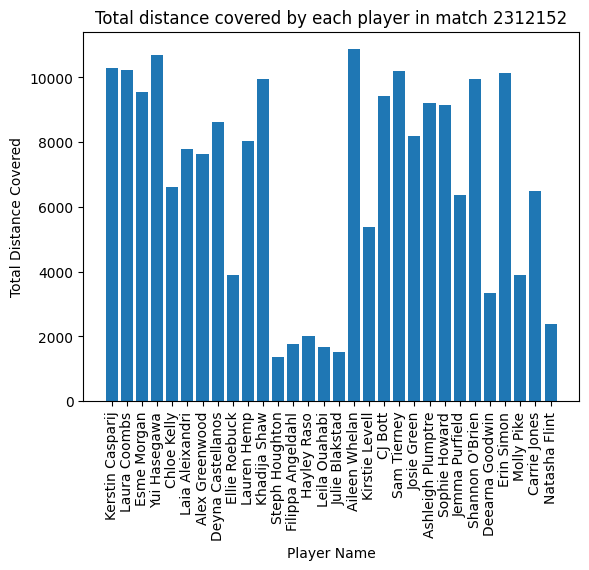

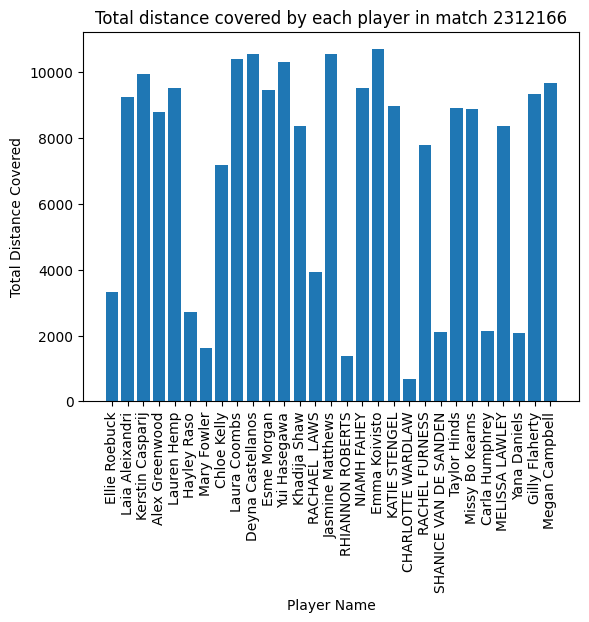

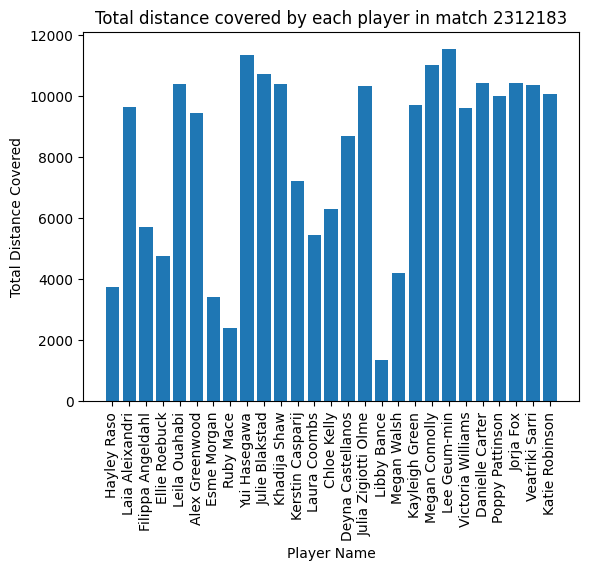

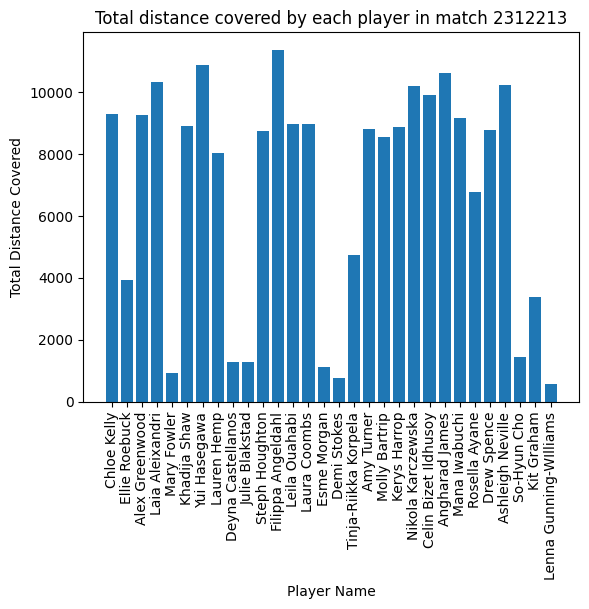

In [109]:
for i in dict_matches:

    total_distances = {}
    for j in dict_matches[i]:
        total_distances[j] = df.loc[(df['player_name']==j) & (df['game_opta_id'] == i)]['Total Distance'].sum()

    plt.figure()
    plt.title(f"Total distance covered by each player in match {i}")
    keys = total_distances.keys()
    values = total_distances.values()
    plt.bar(keys, values)
    plt.xticks(rotation=90)
    plt.xlabel('Player Name')
    plt.ylabel('Total Distance Covered')
    plt.show()


# Visualise all the distances (walking, jogging) covered by each player in each match

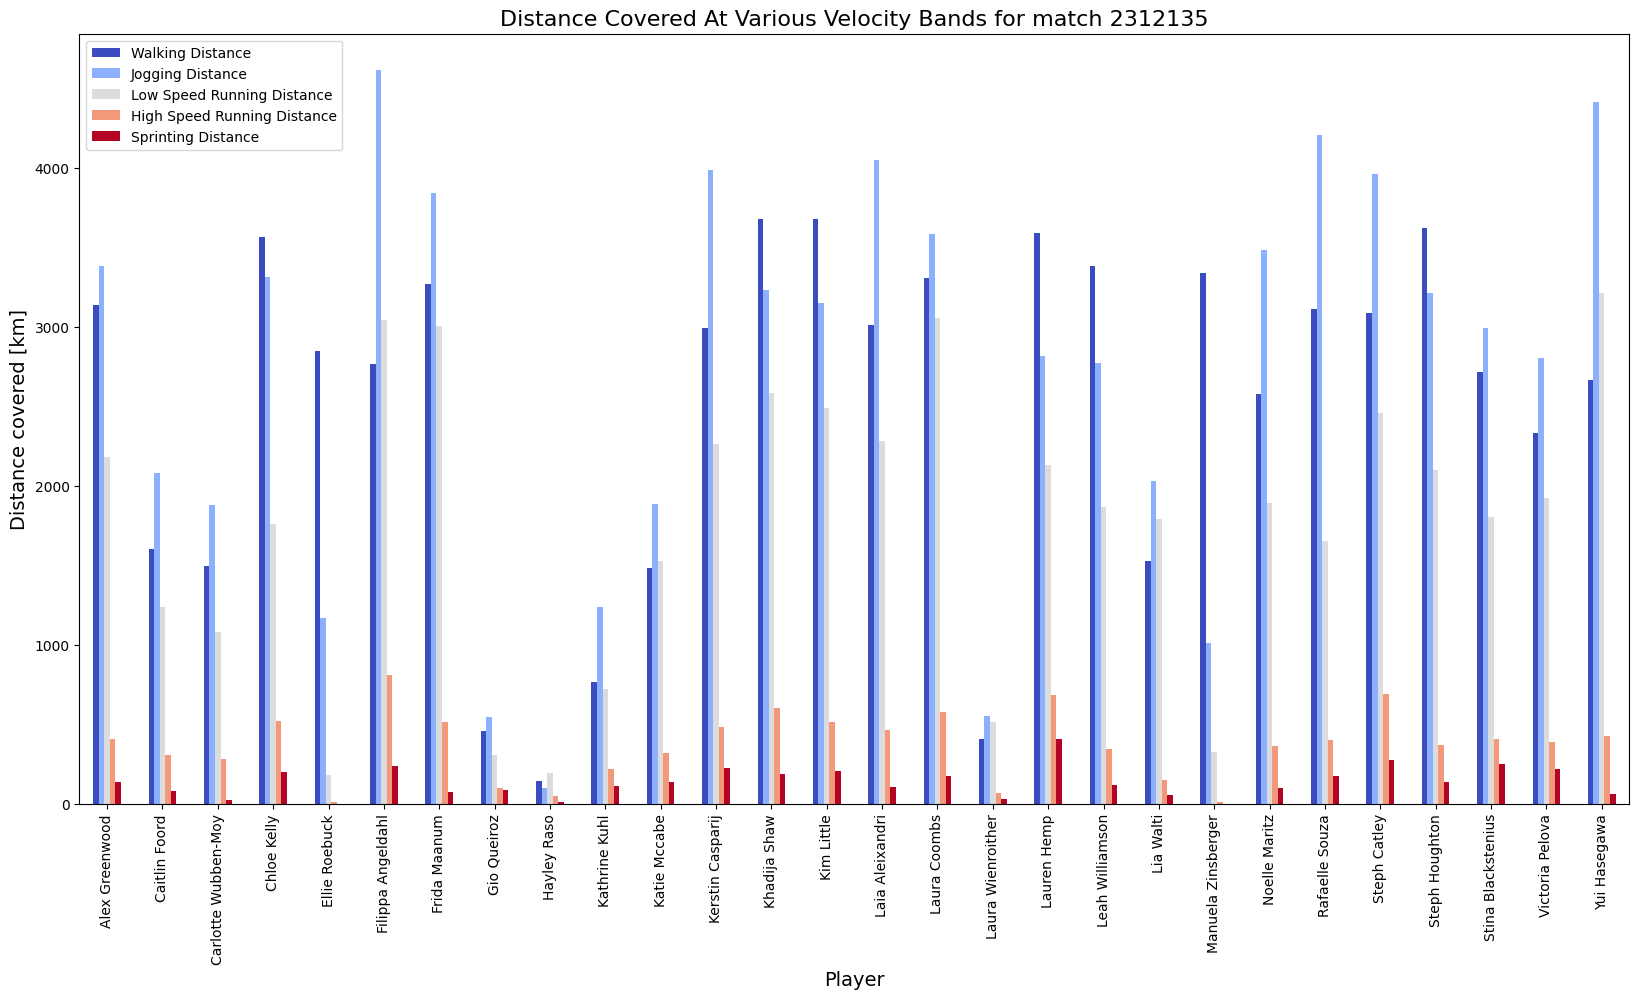

In [165]:


home_summary = df.loc[df['game_opta_id'] == 2312135]

home_summary = home_summary.groupby(['player_name']).agg({
    'Walking Distance': "sum", 
    'Jogging Distance': "sum",
    'Low Speed Running Distance': 'sum',
    'High Speed Running Distance': 'sum',
    'Sprinting Distance': 'sum',
    })


ax = home_summary[['Walking Distance','Jogging Distance','Low Speed Running Distance','High Speed Running Distance','Sprinting Distance']].plot.bar(
    colormap='coolwarm', figsize=(20, 10))
ax.set_xlabel('Player', fontsize = 14)
ax.set_ylabel('Distance covered [km]', fontsize = 14)
ax.set_title(f"Distance Covered At Various Velocity Bands for match {2312135}", fontsize = 16)
plt.show()

In [163]:
home_summary

,Walking Distance,Jogging Distance,Low Speed Running Distance,High Speed Running Distance,Sprinting Distance
player_name,,,,,
Alex Greenwood,3139.50,3386.86,2179.17,409.82,136.86
Caitlin Foord,1605.12,2080.08,1235.43,307.58,77.41
Carlotte Wubben-Moy,1495.50,1882.84,1079.35,281.33,24.23
Chloe Kelly,3565.54,3317.85,1760.36,517.94,202.75
Ellie Roebuck,2848.79,1169.95,179.23,10.68,0.00
Filippa Angeldahl,2766.37,4615.44,3047.31,808.66,238.10
Frida Maanum,3271.46,3845.27,3004.90,515.71,73.42
Gio Queiroz,457.19,547.35,306.44,99.45,83.98
Hayley Raso,143.46,101.42,192.90,50.91,10.95
